In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from IPython.display import display,Math
import scipy as sci
from scipy.signal import find_peaks
import sympy.plotting.plot as symplot

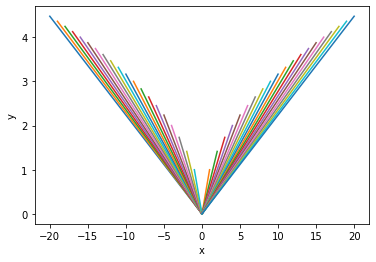

In [2]:
# plotting lines

x = sym.symbols('x')
y = sym.sqrt(sym.Abs(x))

for pnti in range(-20,21):
    plt.plot([0,pnti],[0,y.subs(x,pnti)])

plt.xlabel('x')
plt.ylabel('y')

plt.show()

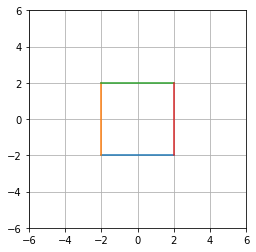

In [4]:
# plotting lines2
x = 3
y = 5
# plt.plot(x,y,'ro')
# plt.plot([0,x],[0,y]) # plots streight line 

plt.axis('square')
plt.axis([-6,6,-6,6])
plt.grid()

#----------------left/bottom
plt.plot([-2,2],[-2,-2]) # horizontal line (at bottom)
plt.plot([-2,-2],[-2,2]) # vertical line (at left)
#----------------right/top
plt.plot([2,-2],[2,2]) # horizontal line (at top)
plt.plot([2,2],[2,-2]) # vertical line (at right)

plt.show()

2


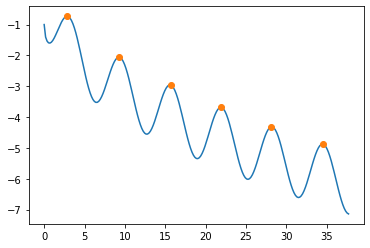

In [3]:
# minima and minima of a function
x = np.linspace(0,12*np.pi,213)
fx = -np.cos(x) - np.sqrt(x)

peeks = find_peaks(fx)
print(len(peeks))

plt.plot(x,fx)
plt.plot(x[peeks[0]],fx[peeks[0]],'o')
plt.show()

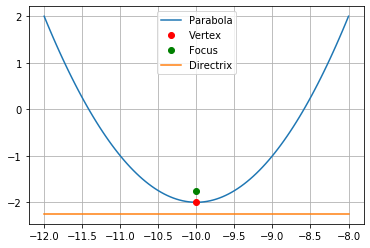

In [5]:
# parabolas
a = 1 # 1/4p = a, 1 = a4p, , 1/4a
p = 1/(4*a)
h = -10
k = -2
n = 100

# x-axis point to evaluate the function
x = np.linspace(h-2,h+2,n)

# create the function
y = a*(x-h)**2 + k

# plot the parabola
plt.plot(x,y,label='Parabola')

# plot the vertex
plt.plot(h,k,'ro',label='Vertex')

# plot the focus
plt.plot(h,k+p,'go',label='Focus')

# plot the directrix
d = k-p
plt.plot(x[[0,-1]],[d,d],label='Directrix')

plt.legend()
plt.grid()
plt.show()

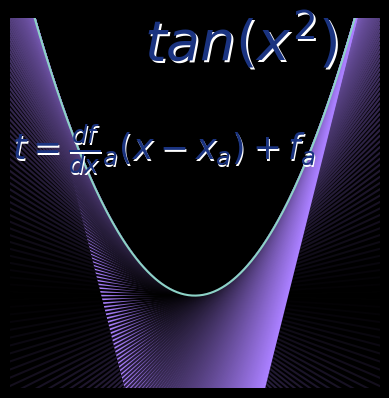

In [17]:
def computetangent(f,xa,bnds):
    # defining derivative and values at point xa
    df = sym.diff(f)
    fa = f.subs(x,xa)
    dfa = df.subs(x,xa)
    
    # evaluate the tangent line
    xx = np.linspace(bnds[0],bnds[1],200)
    return dfa * (xx-xa) + fa
    
x = sym.symbols('x')
f = x**2
xx = np.linspace(-2,2,200)
ffun = sym.lambdify(x,f)(xx)


for a in xx:
    y = computetangent(f,a,xx[[0,-1]])
    plt.plot(xx,y,color=[abs(a)/3,abs(a)/4,abs(a)/2])

    
# plt.text(-.5, 1.5, r'$tan(x^2)$', # original
#          fontsize=40)
# plt.style.use('dark_background') # original color
# plt.style.use('seaborn-darkgrid')

# ------default text-------
plt.text(-.53, 2.52, r'$tan(x^2)$',fontstyle='italic',fontsize=40)
plt.text(-.55, 2.55, r'$tan(x^2)$',color=(0.1, 0.2, 0.5),fontsize=40)

# -------------------------

# ----lagrange notation-----
# plt.text(-1.965,1.465,'$t = f\'_a(x - x_a) + f_a$',fontsize=25)
# plt.text(-2,1.5,'$t = f\'_a(x - x_a) + f_a$',color=(0.1, 0.2, 0.5),fontsize=25)
# ----leibniz notation-----
plt.text(-1.965,1.465,'$t = \\frac{df}{dx}_a(x - x_a) + f_a$',fontsize=25)
plt.text(-1.978,1.49,'$t = \\frac{df}{dx}_a(x - x_a) + f_a$',color=(0.1, 0.2, 0.5),fontsize=25)
# -2,1.5, default



# plt.text(-2, 1.5, '$t = f\'_a(x - x_a) + f_a$',fontsize=25)
plt.plot(xx,ffun)
plt.style.use('dark_background') # original color
# plt.style.use('seaborn-darkgrid')
plt.axis('square')
plt.axis([-2,2,-1,3])
plt.axis('off')
# plt.savefig('tan.png') # exports as image
plt.savefig('tanAlpha.png',transparent=True) # exports as figure # alpha channel test
plt.show()

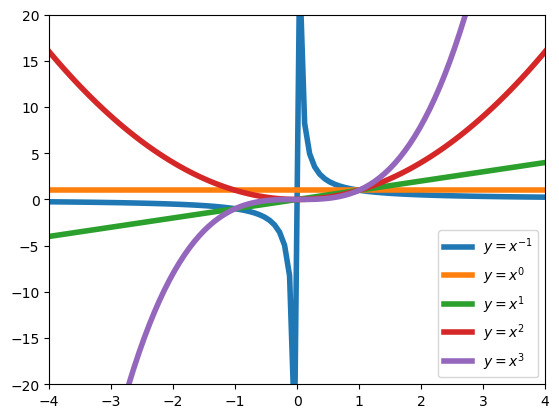

In [14]:
# graphing rational functions
x = np.linspace(-4,4,100)
e = range(-1,4)
plt.style.use('default')

for i in e:
    y = x**i
    plt.plot(x,y,label='$y=x^{%s}$' %i,linewidth=4) # encased in $ converts to latex, x^{%s} show latex exponent
    
plt.legend()
plt.xlim([x[0],x[-1]])
plt.ylim([-20,20])

# plt.savefig('coolPythonGraph.png') # exports as figure
plt.savefig('coolPythonGrapha.png',transparent=True) # exports as figure # alpha channel test
# fig.savefig('Sub Directory/graph.png') # example with path
plt.show()

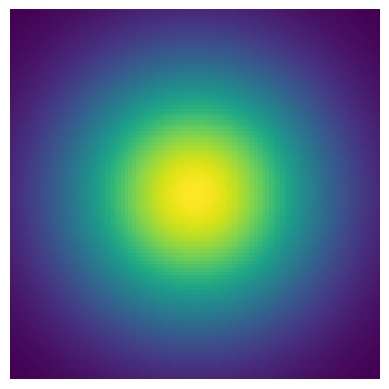

In [18]:
# Creating contours from mesh in Python
x = np.linspace(-2,2,100)
X,Y = np.meshgrid(x,x)
s = 2
plt.style.use('default')

gauss2d = np.exp( -(X**2 + Y**2)/s)

plt.imshow(gauss2d)
plt.axis('off')
plt.show()

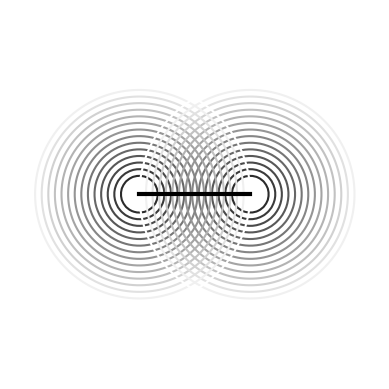

In [17]:
# graphing circles
h = [-1.5,1.5]

x = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,x)

for r in np.linspace(.5,3,15):
    for hi in h:
        Fxy = (X-hi)**2 + Y**2 - r**2
        plt.contour(X,Y,Fxy,0,colors=[r/3,r/3,r/3])

plt.axis('off')
plt.style.use('default')
plt.gca().set_aspect('equal')
plt.plot(h,[0,0],'k',linewidth=3)
plt.show()


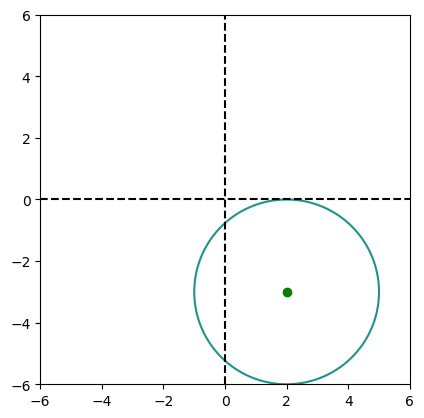

In [20]:
# Graphing circles2
h = 2
k = -3
r = 3




axlim = r + np.max((abs(h),abs(k)))
x = np.linspace(-axlim,axlim,100)

X,Y = np.meshgrid(x,x)

# Fxy = (X-h)**2 + (Y-k)**2 = r**2
Fxy = (X-h)**2 + (Y-k)**2 -r**2

plt.contour(X,Y,Fxy,0)
plt.plot([-axlim,axlim],[0,0],'k--')
plt.plot([0,0],[-axlim,axlim],'k--')
plt.plot(h,k,'go')

# plt.axis('square')
plt.gca().set_aspect('equal')
plt.show()

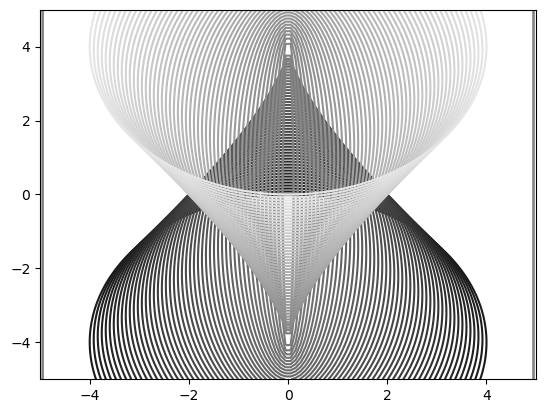

In [24]:
# Graphing ellipses
h = 0
# k = np.linspace(-4,4,50) # default
k = np.linspace(-4,4,100)
kl = len(k)
colors = np.linspace(.1,.9,kl)
b = 4

x = np.linspace(-5,5,len(k))
X,Y = np.meshgrid(x,x)

for r in range(len(k)):
    ellipse = (X-h)**2/abs(k[r])**2 + (Y-k[r])**2/b**2 - 1
    plt.contour(X,Y,ellipse,0,\
    colors=[colors[r],colors[r],colors[r]])


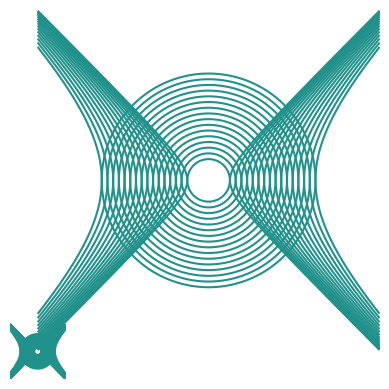

In [30]:
# graphing hyperbolas
n = 16
ab = np.linspace(1,5,n)

axlim = 8
x = np.linspace(-axlim,axlim,100)
X,Y = np.meshgrid(x,x)


#---------------------------
for i in range(0,n):
    F1 = X**2/ab[i]**2 - Y**2/ab[i]**2 - 1
    plt.contour(X,Y,F1,0)
    
    F2 = X**2/ab[i]**2 + Y**2/ab[i]**2 - 1
    plt.contour(X,Y,F2,0)
# ------------
for i in range(0,n):
    F1 = X**2/ab[i]**2 - Y**2/ab[i]**2 - 1
    plt.contour(F1,0)
    
    F2 = X**2/ab[i]**2 + Y**2/ab[i]**2 - 1
    plt.contour(F2,0)
    
plt.axis('off')
plt.gca().set_aspect('equal')
plt.show()

In [32]:
# compute remainder

# create a function that inputs two numbers and reports the numbers, 
# their integer division, and remainder

# define the function
def computeremainder():
    x = int( input('Input numerator: ') )
    y = int( input('Input denominator: ') )
    division  = int( x/y )
    remainder = x%y
    
    print("%g goes into %g, %g times with a remainder of %g." %(y,x,division,remainder))
    
computeremainder()

Input numerator: 5
Input denominator: 7
7 goes into 5, 0 times with a remainder of 5.


In [36]:
# compute powers of larger magnitude numbers
# create a function that takes two numbers as input, 
# and returns the larger-magnitude number to the power of the smaller-magnitude number

def powerfun():
    n1 = int( input('Input one number ') )
    n2 = int( input('Input a second number ') )
    
    # test
    if abs(n1)>abs(n2):
        return n1,n2,n1**n2
    else:
        return n2,n1,n2**n1
    
# ---- test function here -----
first,second,outcome = powerfun()

display(Math('%g^{%g} = %g '%(first,second,outcome)))

Input one number 2
Input a second number 1


<IPython.core.display.Math object>

In [29]:
# compute power or devision

# input three numbers from user, x, y, and a switch option
#    Create two functions that will compute x**y and x/y
#    call the appropriate function and print the result

from IPython.display import display,Math

# create functions
def powers(x,y):
    display(Math('%g^{%g} = %g' %(x,y,x**y)))

def division(x,y):
    display(Math('\\frac{%g}{%g} = %g' %(x,y,x/y)))
    
def mainfunction():
    x = int(input('input X: '))
    y = int(input('input Y: '))
    display(Math('\\text{Press "1" to compute} %g^{%g}\\text{ or "2" to compute }\\frac{%g}{%g}' %(x,y,x,y)))
    which = int(input(' '))
    
    if which==1:
        powers(x,y)
    elif which==2:
        division(x,y)
    else:
        print('Invalid selection!')
        
        
# -------execute-------
mainfunction()

input X: 2
input Y: 8


<IPython.core.display.Math object>

 1


<IPython.core.display.Math object>

In [38]:
# guess a number! game
# write code to generate a random integer and then input user guesses of that integer. 
# The code should tell the user to guess higher or lower until they get the right answer.

from numpy import random

def guessTheNumber():
    num2guess = random.randint(1,101)
    
    userguess = int( input('Guess a number between 1 and 100  ') )
    while userguess!=num2guess:
        if userguess>num2guess:
            print('Guess lower!')
        elif userguess<num2guess:
            print('Guess higher!')
        
        userguess = int( input('Guess again ') )
    
    print('Got it! The right number was %g and your final guess was %g'%(num2guess,userguess))

    
# ---- execute------
guessTheNumber()

Guess a number between 1 and 100  3
Guess higher!
Guess again 50
Guess higher!
Guess again 75
Guess higher!
Guess again 85
Guess higher!
Guess again 90
Got it! The right number was 90 and your final guess was 90


In [40]:
# compute squares
x,y = sym.symbols('x,y')
#expr = x**2 + 4 this line was used in original script. no longer used
for num in range(-2,3):
    ans = (x+4).subs(x,num**2)
    display(Math('\\text{with x} = %g, x^2 +4 \\quad \\Rightarrow \\quad %g^2 -4= %g' %(num,num, ans)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [41]:
# ----deviding polynomials----
x,y = sym.symbols('x,y')

pNum = x**6 +2*x**4 +6*x-y
pDem = x**3 + 3

for yi in range(5,16):
    
    tempNum = pNum.subs(y,yi)
    display(Math('%s = %s ' %(sym.latex(tempNum/pDem),sym.latex(sym.simplify(tempNum/pDem)))))
    
    if sym.fraction(sym.simplify(tempNum/pDem))[1]==1:
        rightans = yi
        
print('the answer that satisfies our goal ia y=%g' %(rightans))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

the answer that satisfies our goal ia y=9


In [42]:
# multiplication table
nums = range(1,11)

matmult = np.zeros((len(nums),len(nums)),dtype=int) # dtype=int removes '.0' from each element

for rowi in nums:
    for coli in nums:
        matmult[rowi-1,coli-1] = (rowi)*(coli)
                   
display(Math(sym.latex(sym.sympify(matmult))))

<IPython.core.display.Math object>

In [43]:
# Factoring polynomials

exprs = [ x**2 + 4*x + 3 , 2*y**2-1 , 3*y**2 + 12*y]

for ei in exprs:
    stringfact = str(sym.factor(ei))
    
    if stringfact.find('(') !=-1:
        display(Math('%s \\quad \\Rightarrow \\quad %s' %(sym.latex(ei),sym.latex(sym.latex(ei)))))
    else:
        display(Math('%s \\quad \\Rightarrow \\quad \\text{Not factorable}' %(sym.latex(ei))))

#     print(stringfact)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [44]:
# expanding terms

# f(x,y) = (4 +x )(2 - y)
# substitute x,y with {0,1,2}
# print(when x = 0 and y = 0, f(x,y)=8)
from sympy.abc import x
from sympy.abc import y
fxy = (4+x)*(2-y)

numrange = range(0,3)

for xi in numrange:
    for yi in numrange:
        print('when x = %g and y = %g, f(x,y) = %g' %(xi,yi,fxy.subs({x:xi,y:yi})))
    
# for i in range(30):
#     display(Math(sym.latex(expr.subs({x:i,y:i}))))

when x = 0 and y = 0, f(x,y) = 8
when x = 0 and y = 1, f(x,y) = 4
when x = 0 and y = 2, f(x,y) = 0
when x = 1 and y = 0, f(x,y) = 10
when x = 1 and y = 1, f(x,y) = 5
when x = 1 and y = 2, f(x,y) = 0
when x = 2 and y = 0, f(x,y) = 12
when x = 2 and y = 1, f(x,y) = 6
when x = 2 and y = 2, f(x,y) = 0


In [47]:
# expanding expressions
# use sympy to expand and simplify these expressions
x = sym.symbols('x')

e1 = 2*x + x*(4-6*x) + x
e2 = -x * (2/x + 4/(x**2)) + (4+x)/(4*x)
e3 = (x + 3)*(x-3)*x*(1/(9*x))

# make a list of the expressions
exprs = [e1,e2,e3]

for i in range(0,3):
    display(Math('%s \\quad \\Longleftrightarrow \\quad %s' %(sym.latex(exprs[i]),sym.latex(sym.expand(exprs[i])))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [45]:
# simplify with matrices
x,y = sym.symbols('x,y')
fxy = (4+x)*(2-y)

xyset = range(0,3)

outmat = np.zeros([len(xyset),len(xyset)])

for i in xyset:
    for j in xyset:
        outmat[i,j] = fxy.subs({x:i,y:j})
        
display(Math(sym.latex(sym.sympify(outmat))))

<IPython.core.display.Math object>

In [50]:
# greatest common denominator
import math


# GCD is defined for integers! ie=math.gcd(1,.3)
# math.gcd(95,100)
math.gcd(0,3)


ro = 10
co = 15

gcdMat = np.zeros([ro,co],dtype=int)+99

for rowi in range(0,ro):
    for coli in range(0,co):
        gcdMat[rowi,coli] = math.gcd(rowi+1,coli+1)

display(Math(sym.latex(sym.sympify(gcdMat))))

<IPython.core.display.Math object>

In [52]:
# solving for x and y with dictionaries

x,y = sym.symbols('x,y')

# count number of x's and y's in the equation
D = dict(eqsWithX=[4*x-6,x**2-9],eqsWithY=[sym.sin(y)])

# solve them in a loop
for keyi in D:
    
    print('Equations solving for ' + keyi[-1] + ':')
    
    for i in D[keyi]:
        
        fullEQ     = sym.latex(sym.sympify(i)) + ' = 0'
        middlepart = '\\quad\\quad \\Rightarrow\\quad\\quad ' + keyi[-1] + ' = '
        soln       = sym.latex(sym.solve(i))
        
        display(Math( '\\quad\\quad ' + fullEQ + middlepart + soln ))

Equations solving for X:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Equations solving for Y:


<IPython.core.display.Math object>

In [55]:
# compute composit and prime

# loop through numbers and report whether each number is composite or 
# prime

nums = range(100,119)
for i in nums:
    di = sym.factorint(i)
    ks = list(di.keys())
    if len(di)==1 and di[ks[0]]==1:
        print('%s is a prime number' %i)
    else:
        print('%s is a composite number with prime factors %s' %(i,list(di.keys())))

100 is a composite number with prime factors [2, 5]
101 is a prime number
102 is a composite number with prime factors [2, 3, 17]
103 is a prime number
104 is a composite number with prime factors [2, 13]
105 is a composite number with prime factors [3, 5, 7]
106 is a composite number with prime factors [2, 53]
107 is a prime number
108 is a composite number with prime factors [2, 3]
109 is a prime number
110 is a composite number with prime factors [2, 5, 11]
111 is a composite number with prime factors [3, 37]
112 is a composite number with prime factors [2, 7]
113 is a prime number
114 is a composite number with prime factors [2, 3, 19]
115 is a composite number with prime factors [5, 23]
116 is a composite number with prime factors [2, 29]
117 is a composite number with prime factors [3, 13]
118 is a composite number with prime factors [2, 59]


In [56]:
# adding polynomials

# create a list of polynomials
# loop through. if order is even, sum the coeffs. if order is odd, count the number of coeffs

polys = [ sym.Poly(2*x + x**2), sym.Poly(-x**3 + 4*x), sym.Poly(x**5-x**4+1/4*x+4) ]

for poli in polys:
    if poli.degree()%2==0:
        print('The degree of %s is even, and the coefficients sum to %s.' %(poli.as_expr(),sum(poli.coeffs())))
    else:
        print('The degree of %s is odd, and there are %s coefficients.' %(poli.as_expr(),len(poli.coeffs())))

The degree of x**2 + 2*x is even, and the coefficients sum to 3.
The degree of -x**3 + 4*x is odd, and there are 2 coefficients.
The degree of 1.0*x**5 - 1.0*x**4 + 0.25*x + 4.0 is odd, and there are 4 coefficients.


In [58]:
# Multiplying polynomials

# with x's and y's, substitute before vs after multiplication
x,y = sym.symbols('x,y')

fxy = 4*x**4 - 9*y**3 - 3*x**2 + x*y**2
gxy = 4/5*y**3 - x**3 + 6*x**2*y

display(Math( '(%s)\quad\\times\quad(%s) \quad=\quad %s' %(sym.latex(fxy),sym.latex(gxy),sym.latex(sym.expand(fxy*gxy)) )))

<IPython.core.display.Math object>

In [59]:
# first, a primer on sym.fraction

num = sym.sympify(3)/sym.sympify(4)
# num = sym.sympify(3/4)

finfo = sym.fraction(num)
print(type(finfo))
print(finfo[0])

# can also isolate the numerator separately
num = sym.fraction(num)[0]
print(num)

# ---------------------#

# use a loop to find the integer value of y that makes this equation simplify
pNum = x**6 + 2*x**4 + 6*x  - y
pDen = x**3 + 3


for i in range(5,16):
    
    pnum = pNum.subs({y:i})
    display(Math('\\frac{%s}{%s} = %s' %(sym.latex(pnum),sym.latex(pDen),sym.latex(sym.simplify(pnum/pDen))) ))
    
    if sym.fraction(sym.simplify(pnum/pDen))[1]==1:
        rightnumber = i

print( 'When y=%g, there is no denominator!' %rightnumber)

<class 'tuple'>
3
3


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

When y=9, there is no denominator!


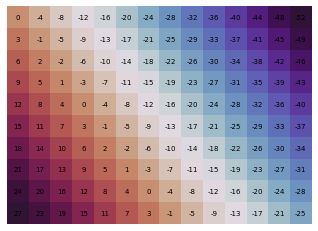

In [3]:
# images from matrices

# experimenting with settings from above cell
# a(subscript i,j) = 3*i - 4*j
A = np.zeros((10,14)) # default
# A = np.zeros((20,24))


# print(np.shape(A)) # returns shape of matrix ie A = np.zeros((10,14)) has 10 rows 14 cols

for i in range(0,np.shape(A)[0]):
    for j in range(0,np.shape(A)[1]):
        A[i,j] = 3*i - 4*j
        

plt.imshow(A)
# plt.plot([0,3],[8,2],'r',linewidth=4)

for i in range(0,np.shape(A)[0]):
    for j in range(0,np.shape(A)[1]):
        plt.text(j,i,int(A[i,j]),horizontalalignment='center',verticalalignment='center',fontsize=7) # 3 inputs corrospond to x,y,actual text

        plt.set_cmap('twilight_shifted')
        
# plt.savefig('ColorShift.jpg') # exports as image
plt.axis('off')
plt.show()

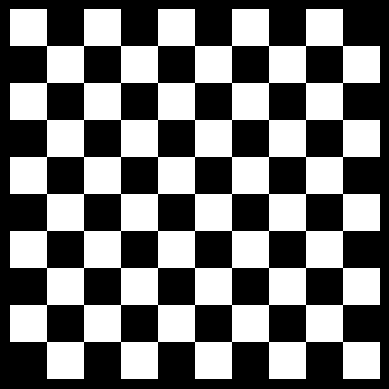

In [110]:
# Images from matrices 2
N = 10 # soft coding
C = np.zeros((N,N))

for i in range(0,N):
    for j in range(0,N):
        C[i,j] = (-1)**(i+j)
        

plt.imshow(C)
plt.set_cmap('gray')
plt.tick_params(labelleft=False,labelbottom=False)
plt.axis('off')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

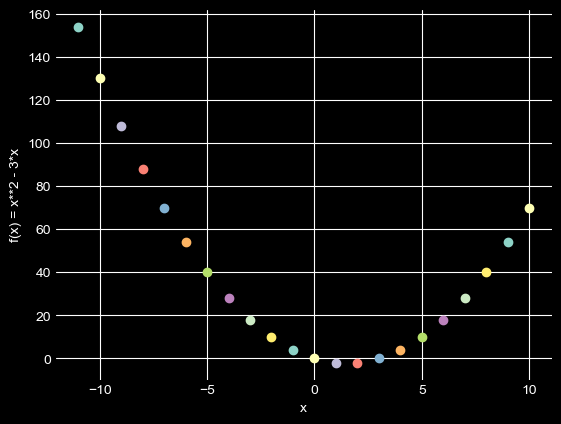

In [111]:
# plotting coordinates on xy plane
x = sym.symbols('x')
y = x**2 - 3*x

for pnti in range(-11,11):
    plt.plot(pnti,y.subs(x,pnti), 'o')

plt.xlabel('x')
plt.ylabel('f(x) = %s' %y)
plt.show

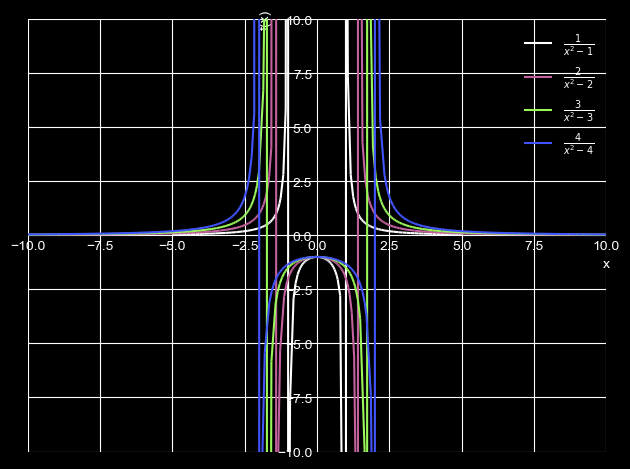

In [117]:
# plotting functions with sympy
y = a/(x**2 - a)

p = None # clears variable
p = symplot(y.subs(a,1),(x,-5,5),show=False)
p[0].label = '$%s$' %sym.latex(y.subs(a,1))

for i in range(2,5):
    p.extend(symplot(y.subs(a,i),(x,-10,10),show=False))
#     p.extend(symplot(y.subs(a,i),(x,-5,5),show=False)) # default
    p[i-1].label = '$%s$' %sym.latex(y.subs(a,i))
    p[i-1].line_color = list(np.random.rand(3)) # creates randon numbers. evenly distributes

p.xlim = [-10,10]
p.ylim = [-10,10]
p.legend = True
p.show() 

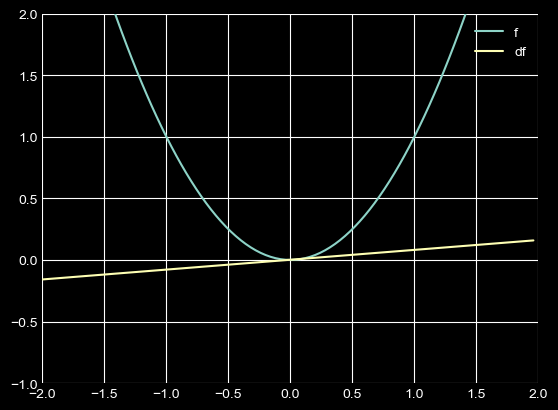

In [119]:
# discreet derivative
x = np.linspace(-2,2,101)
f = x**2
df = np.diff(f)

plt.plot(x,f,label='f')
plt.plot(x[0:-1],df,label='df')

# plt.grid()
plt.axis([-2,2,-1,2])
plt.legend()
plt.show()

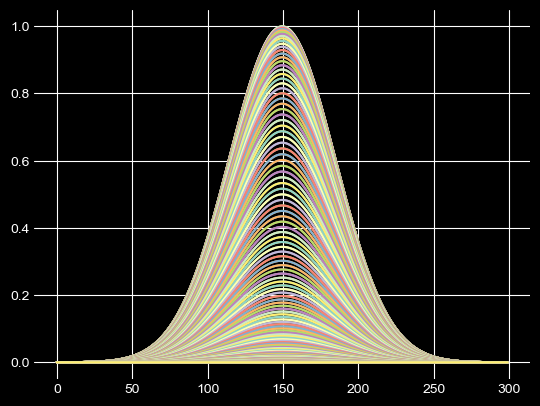

In [121]:
# Make a gaussian
# x = np.linspace(-2,2,100)
h = .999
x = np.linspace(-3,3,300)
r = 3
# h = 4
k = 2
X,Y = np.meshgrid(x,x)

# create the gaussian
T,Y = np.meshgrid(x,x)
gauss2d = np.exp( -(X**2+Y**2) )
# gauss2d = np.exp((-4*np.log(2))*(T**2) /( h**2) -Y)

# and plot
# plt.imshow(gauss2d)
plt.plot(gauss2d)
# plt.axis('off')
plt.show()

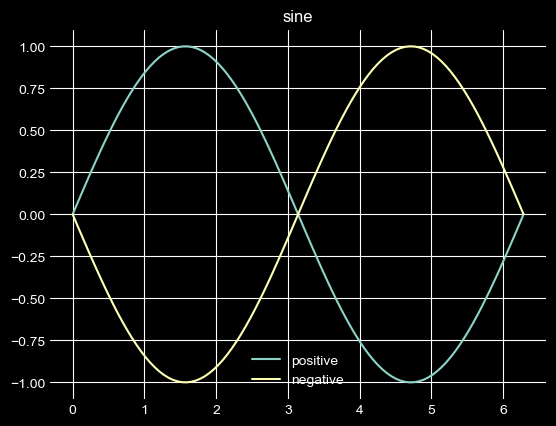

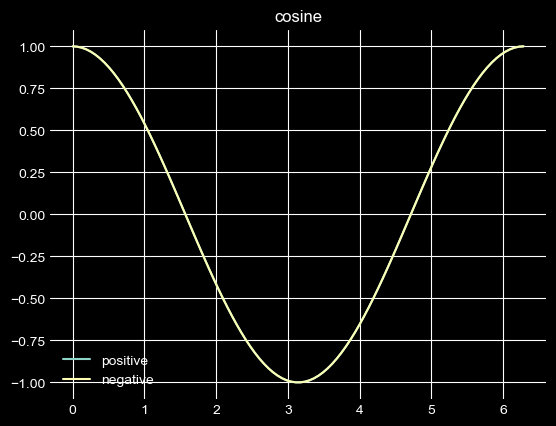

In [122]:
# even/odd function
x = np.linspace(0,2*np.pi,100)
co = np.cos(x)
negco = np.cos(-x)
si = np.sin(x)
negsi = np.sin(-x)

plt.plot(x,si,label='positive')
plt.plot(x,negsi,label='negative')
plt.title('sine')
plt.legend()
plt.subplots()
plt.plot(x,co,label='positive')
plt.plot(x,negco,label='negative')
plt.title('cosine')
plt.legend()
plt.show()

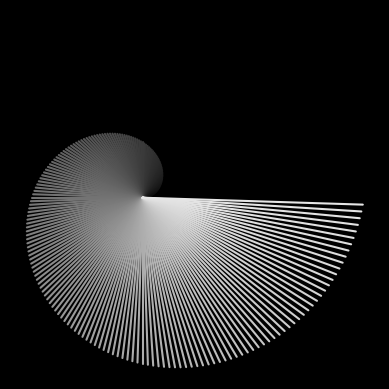

In [126]:
# complex roots of unity
n = 200
color = np.linspace(0,.9,n)

for k in range(0,n):
    z = k*np.exp( 2*np.pi*1j*k/n)
    plt.plot([0,np.real(z)],[0,np.imag(z)],color=[color[k],color[k],color[k]])
    
plt.axis('square')
plt.axis('off')
plt.show()

(-2.9000000000000004, 104.9, -2.9000000000000004, 104.9)

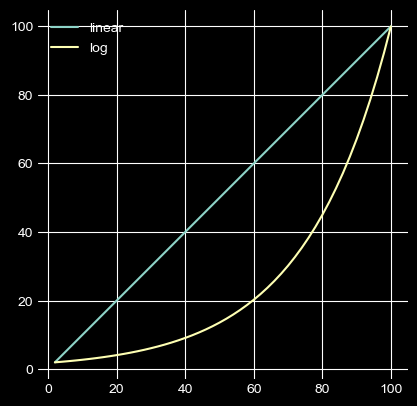

In [127]:
# log and linearly spaced numbers
a = 2
b = 100
n = 50

li = np.linspace(a,b,n)
lo = np.logspace(np.log10(a),np.log10(b),n)

plt.plot(li,li,label='linear')
plt.plot(li,lo,label='log')

plt.legend()
plt.axis('square')

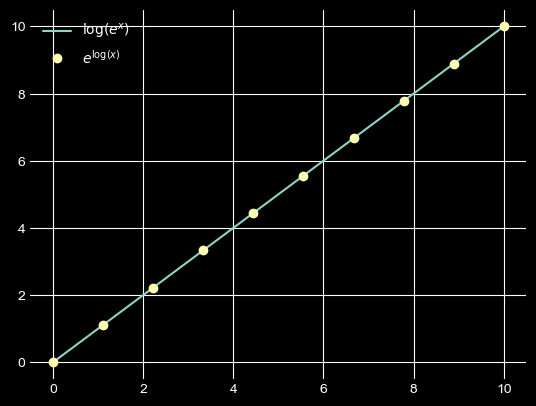

In [128]:
# natural exponents and logarithm
x = np.linspace(.0001,10,10)

y1 = np.log( np.exp(x) )
y2 = np.exp( np.log(x) )

plt.plot(x,y1,label='$\\log(e^x)$')
plt.plot(x,y2,'o',label='$e^{\\log(x)}$')
plt.legend()

In [129]:
# order of magnitude calculator
num = 9999
# get order of magnitutd
orderOfMag = int(np.floor(np.log10(abs(num))))

# scientific notation
numstr = '{:,e}'.format(num)
wheredot = numstr.find('.')
scinot = numstr[:wheredot]

display(Math('%s \\text{ is } %s \\text{ orders of magnitude } \
 \\approx %s \\times 10^{%g}'  %(num,orderOfMag,scinot,orderOfMag)))


<IPython.core.display.Math object>

C:\Users\Chris\anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Chris\anaconda3\lib\site-packages\ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()


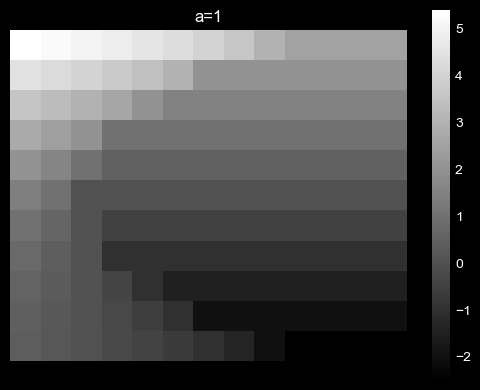

In [138]:
# quadratic equations

# ------------funtion definition: finds roots--------------
def quadeq(a,b,c):
    
    # initialize
    out = np.zeros(2)
    
    # compute
    out[0] = (- b + np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)
    out[1] = (- b - np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)
    
    return(out)

# -----------------------------------------------------------

a =1 
b = range(-5,6)
c = range(-2,11)

M = np.zeros((len(b),len(c)))

for bi in range(0,len(b)):
    for ci in range(0,len(c)):
        M[bi,ci] = quadeq(a,b[bi],c[ci])[0]
        
plt.imshow(M,extent=[c[0],c[-1],b[0],b[-1]])
plt.xlabel('c')
plt.ylabel('b')
plt.title('a=' + str(a))
plt.colorbar()
plt.axis('off')
plt.show()


C:\Users\Chris\anaconda3\lib\site-packages\ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Chris\anaconda3\lib\site-packages\ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


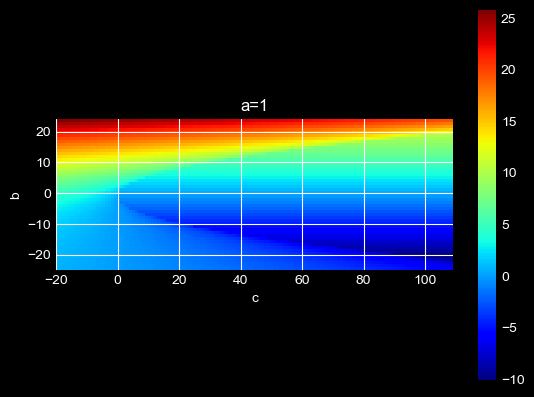

In [159]:
# experimental.colormaps
# quadratic equations

# ------------funtion definition: finds roots--------------
def quadeq(a,b,c):
    
    # initialize
    out = np.zeros(2)
    
    # compute
    out[0] = (- b + np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)
    out[1] = (- b - np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)
    
    return(out)

# -----------------------------------------------------------

a =1 
# b = range(-5,6) # default
# c = range(-2,11) # default
b = range(-25,25)
c = range(-20,110)


M = np.zeros((len(b),len(c)))

for bi in range(0,len(b)):
    for ci in range(0,len(c)):
        M[bi,ci] = quadeq(a,b[bi],c[ci])[0]
        
# plt.imshow(M,extent=[c[0],c[-1],b[0],b[-1]])
plt.imshow(M,cmap='jet',extent=[c[0],c[-1],b[0],b[-1]])

plt.xlabel('c')
plt.ylabel('b')
plt.title('a=' + str(a))
plt.colorbar()
# plt.axis('off')
plt.show()


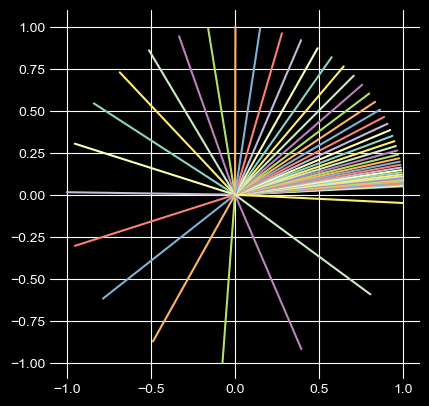

In [161]:
# the unit circle
x = np.linspace(-3,1.83,50)
k = np.exp(x)

for i in k:
    plt.plot([0,np.cos(i)],[0,np.sin(i)])
    
plt.axis('square')
# plt.axis('off') # turns off boundry box
plt.show()

What angle to convert?3
Which unit did you input (radians or degrees)?rad


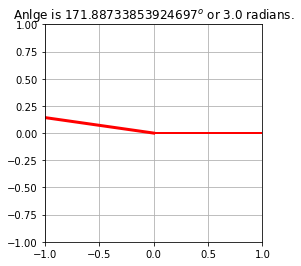

In [3]:
# converting between radians and degrees
def angle_convert_plot():
    
    #get the inputs from the user
    angle = eval( input('What angle to convert?') )
    unit = input('Which unit did you input (radians or degrees)?')
    
    if unit[0].lower() == 'r':
        rad = angle
        deg = np.rad2deg(angle)
    elif unit[0].lower() =='d':
        deg = angle
        rad = np.deg2rad(angle)
    else:
        raise ValueError('Unknown Unit!')
        
    # convert to <360
    
    deg = deg%360
    rad = rad%(2*np.pi)
    
    # make the graph
    plt.plot([0,1],[0,0],'r',linewidth=2)
    plt.plot([0,np.cos(rad)],[0,np.sin(rad)],'r',linewidth=3) 
    plt.axis('square')
    plt.axis([-1,1,-1,1])
    plt.grid()
    plt.title('Anlge is %s$^o$ or %s radians.' %(deg,rad))
    plt.show()
    
# -------- call function----------
angle_convert_plot()

In [ ]:
print(r)

No handles with labels found to put in legend.


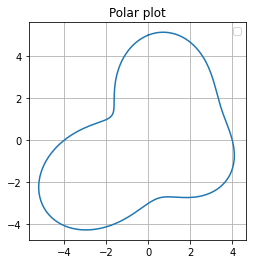

In [3]:
# plotting polar coordinates algorithm
# this can also be used to axtract the the actual coordinates for use in blender geometry

# variable for displaying math notations/functions
x,y = sym.symbols('x,y')
# sym_func()

xx = np.linspace(0,2*np.pi,200)
funci = 4+np.cos(3*xx)+np.sin(2*xx)


# empty arrays are to store the sin and cosin values for the polar plots
func_sin = []
func_cosin = []

# extent = list(range(len(xx)))


# this loop iterates through funci elements and executes polar plots / saves to new coord to new array
for i in range(len(xx)):
#     plt.plot(funci[i]*np.cos(xx[i]),funci[i]*np.sin(xx[i]),'ro') # manual plot of individual coordinates

    func_sin.append(funci[i]*np.sin(xx[i]))
    func_cosin.append(funci[i]*np.cos(xx[i]))
    

   
# plots the polor coordinates using conventional cartesian techniques
plt.plot(func_sin,func_cosin,label='')
plt.legend()

plt.title('Polar plot')
# plt.plot(xx,funci,'go')
# plt.xlabel('label')
plt.axis('square')
plt.grid()
# plt.subplots()
plt.show()

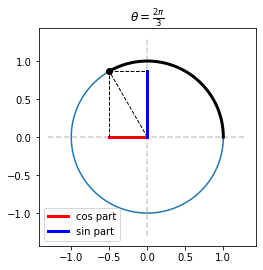

In [4]:
size = 100
circle = np.linspace(0,2*np.pi,size)
thsym = 2*sym.pi/3
angle = float(thsym)
x = np.linspace(0,angle,size)

# create circle
plt.plot(np.cos(circle),np.sin(circle))
plt.plot([-1.3,1.3],[0,0],'--',color=[.8,.8,.8])
plt.plot([0,0],[-1.3,1.3],'--',color=[.8,.8,.8])
plt.axis('square')

# plot the angle
plt.plot(np.cos(angle),np.sin(angle),'ko')
plt.plot(np.cos(x),np.sin(x),'k',linewidth=3)

# plot sin/cos
# plt.plot([0,0],[np.cos(angle),np.sin(angle)])
plt.plot([0,np.cos(angle)],[0,0],'r-',linewidth=3,label='cos part')
plt.plot([0,0],[0,np.sin(angle)],'b',linewidth=3,label='sin part')
#testing
# plt.plot([np.cos(angle),np.sin(angle)],[.5,.0],'y',linewidth=3)
plt.plot([np.cos(angle),np.cos(angle)],[0,np.sin(angle)],'k--',\
         linewidth=1)
plt.plot([np.cos(angle),0],[np.sin(angle),np.sin(angle)],'k--',\
         linewidth=1)
plt.plot([0,np.cos(angle)],[0,np.sin(angle)],'k--',\
        linewidth=1)

# plt.title('$\\theta = $',sym.sympify(angle))
plt.title('$\\theta = %s$' %(sym.latex(thsym)))
# plt.xlabel('cos part')
plt.legend()
plt.show()

### Analyzing Polar Plots

enter number for Rotation .24
Add integer indicating index for analysis5


No handles with labels found to put in legend.


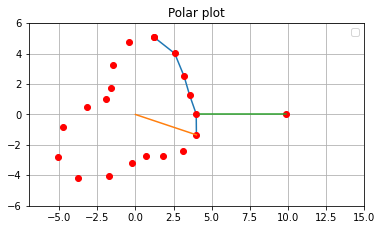

In [4]:
# plotting polar coordinates algorithm
# this can also be used to axtract the the actual coordinates for use in blender geometry
# in this cell I add code to analyze the radius of a specicific point on the computed polor coordinates


# variable for displaying math notations/functions
x,y = sym.symbols('x,y')
# sym_func()

# default function definitions
# rotation = 0 # default
# rotation = .24 # testing
rotation = float(input('enter number for Rotation ')) # for xx rotation testing

# elements in xx
elements = 20
# xx = np.linspace(0,2*np.pi,20) # default
xx = np.linspace(+rotation,2*np.pi+rotation,elements) # rotation testing 
funci = 4+np.cos(3*xx)+np.sin(2*xx)
# empty arrays are to store the sin and cosin values for the polar plots
x = [] # func_sin
y = [] # func_cosin

# this loop iterates through funci elements and executes polar plots / saves to new coord to new array
for i in range(len(xx)):
#     plt.plot(funci[i]*np.cos(xx[i]),funci[i]*np.sin(xx[i]),'ro') # manual plot of individual coordinates

    x.append(funci[i]*np.sin(xx[i]))
    y.append(funci[i]*np.cos(xx[i]))
    
#     adding rotation testing coords # the below code has been successfully tested
#     x_test.append(funci_test[i]*np.sin(xx_test[i]))
#     y_test.append(funci_test[i]*np.cos(xx_test[i]))
    
# these sections of x and y indicate the first few indeces for analytics
x_dot = x[0:6]
y_dot = y[0:6]
plt.plot(x_dot,y_dot)
# seg_coord = 5

# the is to indicate a segment to analyze specified radius
# coord1 = 5 # default
coord1 = int(input('Add integer indicating index for analysis'))
# coords = [0,4,6] # these coords are for visual analytics

# ----pending removal----
# coord2 = 4 
# coord3 = 6 
# coord1 = int(input('please input a number'))
# -----------------------


    
# for i in range(len(xx)):
    
#     diff = np.diff(func_cosin[i],func_sin[i])
#     print('diff',diff,'original coords',func_cosin[i],func_sin[i])
    

   
# plots the polor coordinates using conventional cartesian techniques
plt.plot(x,y,'ro') # default

# ---- pending removal ---- # 
# for i in coords:
#     plt.plot(x[i],y[i],'bo')
# plt.plot(x[coord2],y[coord2],'yo')
# plt.plot(x[coord3],y[coord3],'go')
# -------------------------- #


# plt.plot([0,x_dot[seg_coord]],[0,y_dot[seg_coord]]) # default
plt.plot([0,x[coord1]],[0,y[coord1]])

# for i in range(len(x_dot)):
#     plt.plot([0,x_dot[i]],[0,y_dot[i]])
    

# approximate distance between origins
distance = 4.08089 + 5.7857 # default
# compute radius at coordinate given above - this denotes radius of first main shape
rad = np.sqrt(x[coord1]**2 + y[coord1]**2) # default
# compute radius of second shape at corrosponding coordinate
rad2 = distance - rad
# for i in coords:

#     plt.plot(rad*np.cos(xx),rad*np.sin(xx))
    
# ---- plot radii of second shape ----
# shape_2 = np.linspace(0,2*np.pi,elements) # default
shape_2 = np.linspace(0,2*np.pi,elements)
shape_2 = [.1,.24,.58,.9,.1,.24,1.55]
# plt.plot(distance+np.cos(shape_2),np.sin(shape_2))
# shape_2_seg = shape_2[0:6]
shape_2_seg = [.1,.24,.58,.9,1.24,1.55]
shape_plots_y = [5.883900040270026,5.874608838897597,5.865304442915545,5.875995762613117,5.856695433505722,5.887357852173701]
# print('shape 2',shape_2[0:5])

# for i in range(len(shape_2_seg)):
# #     plt.plot(distance+shape_plots_y[i]*np.cos(shape_2_seg[i]),shape_plots_y[i]*np.sin(shape_2_seg[i]),'yo')
#     plt.plot(shape_2_seg[i],shape_plots_y[i],'go')
# ------------------------------------

# --- plot line representing distance between the two origins ---
# plt.plot([0,distance],[0,0]) # defaul # this plots a line
plt.plot(distance,0,'ro') # plots a dot
# ---------------------------------------------------------------

# anazysis plot for second shape calculation with distance constant as origin
plt.plot([distance,rad],[0,0])
# experimental
# rotation2 = .2 # this alignment works
rotation2 = .19
xx_2 = np.linspace(rotation2,2*np.pi+rotation2,20)
xx_index = 13
# plt.plot(distance+rad2*np.sin(xx_2[xx_index]+mod),rad2*np.cos(xx_2[xx_index]+mod),'yo')
# plt.plot(distance)
# plt.plot(distance,rad,'go')

plt.legend()
plt.title('Polar plot')
plt.axis('square')
plt.axis([-7,15,-6,6])
# plt.axis([3,4.5,-1,1.5]) # for closer examination of plot
plt.grid('on')
plt.show()


### harmonograph

In [ ]:
# leave these parameters as-is
import numpy as np
import matplotlib.pyplot as plt
n = 1000000
t = np.logspace(np.log10(10),np.log10(500),n)

# try chaning these parameters
# this set of Z parameters is used for animating in sequences to conserve memory
Z = np.linspace(-2,2,92)
Z1 = np.linspace(-2,-1,12) # one
Z2 = np.linspace(-1,0,12) # two
Z3 = np.linspace(0,1,12) # three
Z4 = np.linspace(1,2,12) # four
# reversing sequence
Z5 = np.linspace(2,1,12) # five
Z6 = np.linspace(1,0,12) # six
Z7 = np.linspace(0,-1,12) # seven
Z8 = np.linspace(-1,-2,12) # eight

# this parameter is for renderng original harmonograph image
# A = [  1, 1, 1.5, 1.5 ] # original

d = [ .004, .001, .002, .0015 ]
f = [   3, 1, 2, 2.5 ]

# generate XY value pairs
# x = A[0]*np.sin(t*f[0])*np.exp(-d[0]*t) + A[1]*np.sin(t*f[1])*np.exp(-d[1]*t)
# y = A[2]*np.sin(t*f[2])*np.exp(-d[2]*t) + A[3]*np.sin(t*f[3])*np.exp(-d[3]*t)

# these sequences are for generating animation frames
for i in range(len(Z)):
    A = [  Z[i], 1,1.5, 1.5 ]
    x = A[0]*np.sin(t*f[0])*np.exp(-d[0]*t) + A[1]*np.sin(t*f[1])*np.exp(-d[1]*t)
    y = A[1]*np.sin(t*f[2])*np.exp(-d[2]*t) + A[3]*np.sin(t*f[3])*np.exp(-d[3]*t) #original
#     y = A[0]*np.sin(t*f[2])*np.exp(-d[2]*t) + A[3]*np.sin(t*f[3])*np.exp(-d[3]*t)

    plt.plot(x,y,linewidth=.1)
#     plt.savefig('p0harmonograph%g.jpg' %i) # exports as image
#     plt.axis('off')
    plt.axis('square')
#     plt.gca().set_aspect('equal')
    plt.xlim([-4,4])
    plt.ylim([-4,4])
    plt.subplots()
    
# for i in range(len(Z2)):
    
    
    

# plot them!
# plt.plot(x,y,'k',linewidth=.1)
# plt.axis('off')
# plt.grid()
# plt.show()

<ipython-input-14-65777b8bb80c>:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.subplots()


MemoryError: Unable to allocate 7.63 MiB for an array with shape (1000000,) and data type float64

### The elementary components of the plot above

In [ ]:
# The elementary components of the plot above
plt.plot(np.sin(t*f[0])*np.exp(-d[0]*5*t),linewidth=.5)
plt.show()

In [63]:
# experimental
print(len(t))

1000000
